##Engenharia de dados

###Preparação do ambiente

In [1]:
# diretório
#from google.colab import drive
#drive.mount("/content/drive")
#%cd drive/MyDrive/Colab Notebooks
#%cd DSA/Spark/analise


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/DSA/Spark/analise


In [3]:
# Imports
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versão do python e pacotes
!pip install -q -U watermark
from platform import python_version
print(f'Versão python utilizada: {python_version()}.')
%reload_ext watermark
%watermark -a "Fagner Fernands Farias" --iversion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00
Versão python utilizada: 3.10.12.
Author: Fagner Fernands Farias

matplotlib: 3.7.1
numpy     : 1.23.5
scipy     : 1.10.1
seaborn   : 0.12.2
google    : 2.0.3
pandas    : 1.5.3



###Carga

In [5]:
#Carga
dados = pd.read_csv("dataset.csv")

In [6]:
#Visualização
dados.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
# Tipos, null, dimensões.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Labels das variáveis numéricas
nums = dados.select_dtypes(include = 'int64').columns.drop(['ID', 'entregue_no_prazo'])

In [9]:
# Labels das variáveis categóricas
cats = dados.select_dtypes(include = 'object').columns

###Estatísticas

**Numéricas**

In [10]:
# resumo - numéricas
dados[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Aparentemente, somente a variável 'desconto' apresenta assimetria, além de grande variância.

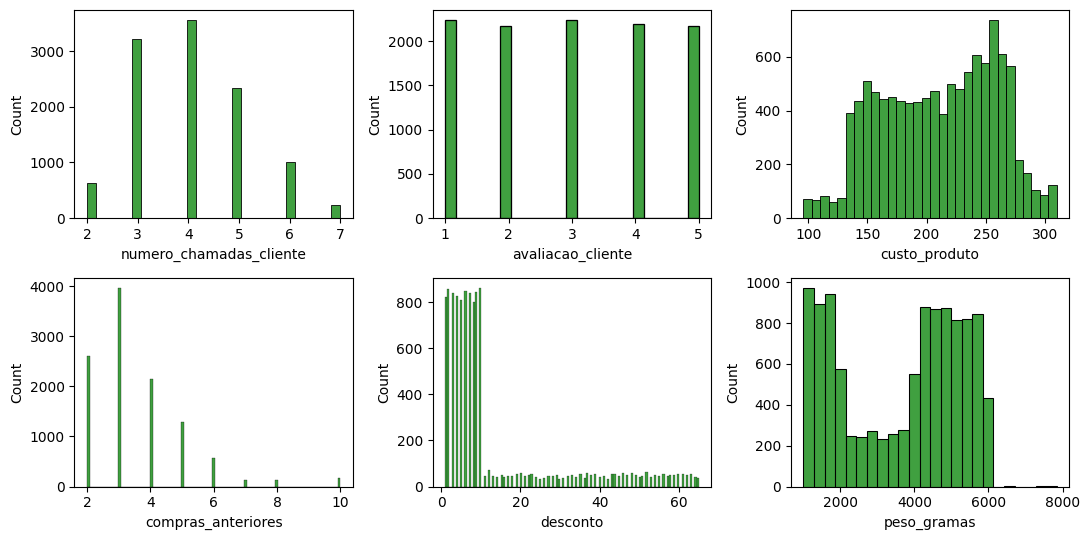

In [11]:
# Visualizando plots
plt.figure(figsize = (11,5.5))
for i, col in enumerate(nums):
  plt.subplot(2, int(len(nums)/2), i + 1)
  sns.histplot(x = dados[col], color = 'green')
  plt.tight_layout()

Interpretação dos gráficos:

- As variáveis 'numero_chamadas_cliente' e 'avaliacao_cliente' parecem uma distribuição uniforme;
- A variável 'desconto', conforme verificado, possui uma distribuição assimétricas à direta;
- A variável 'peso_gramas' possui forma de 'U', sendo uma distribuição bimodal, sugerindo a presença de duas populações em nossos dados.

**Elimimando outliers**

In [12]:
# Aplicando filtragem
registros = np.array([True] * len(dados))
for col in nums:

  zscore = abs(stats.zscore(dados[col]))

  registros = (zscore < 3) & registros

In [13]:
print(f'São {np.count_nonzero(registros)} registros que não são outliers, e, {np.count_nonzero(registros == False)} outliers.')

São 10643 registros que não são outliers, e, 357 outliers.


In [14]:
# Removendo outliers
dados = dados[registros]

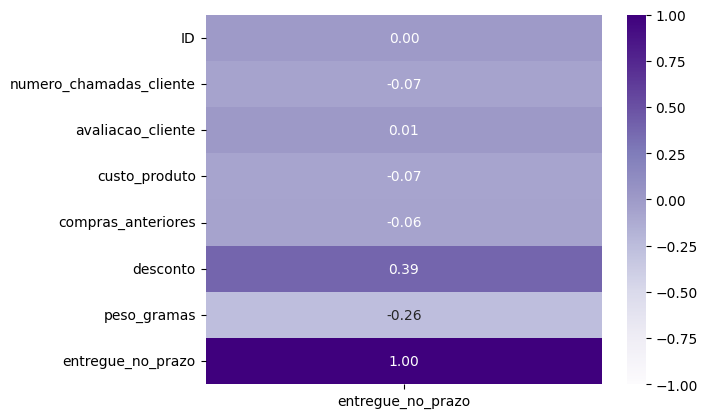

In [15]:
# Visualizando correlações - com a variável alvo
correlacoes = dados.corr()[['entregue_no_prazo']]
np.fill_diagonal(correlacoes.values, 0)
sns.heatmap(data = correlacoes,
            annot = True,
            cmap = 'Purples',
            vmin = -1,
            vmax = 1,
            fmt = '.2f');

Vamos adotar, como parâmetro, uma correlação < -0.05 ou > 0.05.

- Sendo assim prosseguiremos com as variáveis: custo_produto, compras_anteriores, desconto, peso_gramas.

In [16]:
# definindo novas variaveis
nums = ['custo_produto', 'compras_anteriores', 'desconto', 'peso_gramas']

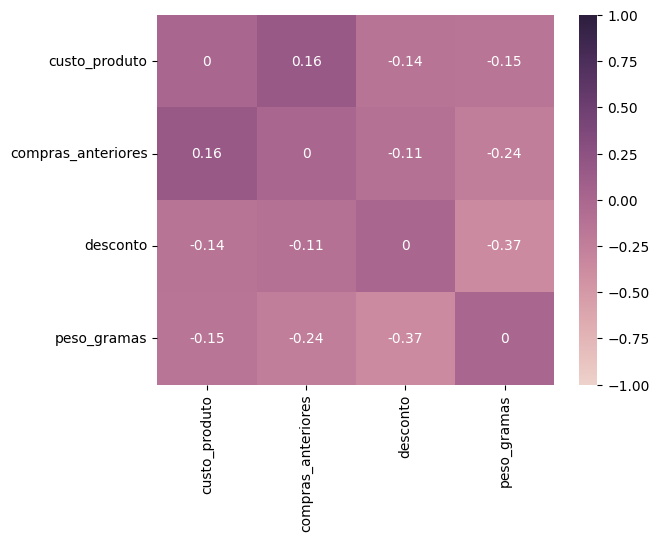

In [17]:
# Verificando multicolinearidade
correlacao = dados[nums].corr()
np.fill_diagonal(correlacao.values, 0)
sns.heatmap(correlacao,
            cmap=sns.cubehelix_palette(as_cmap=True),
            annot = True,
            vmin = -1,
            vmax = 1);

Nâo há indícios de multicolinearidade.

<Figure size 500x300 with 0 Axes>

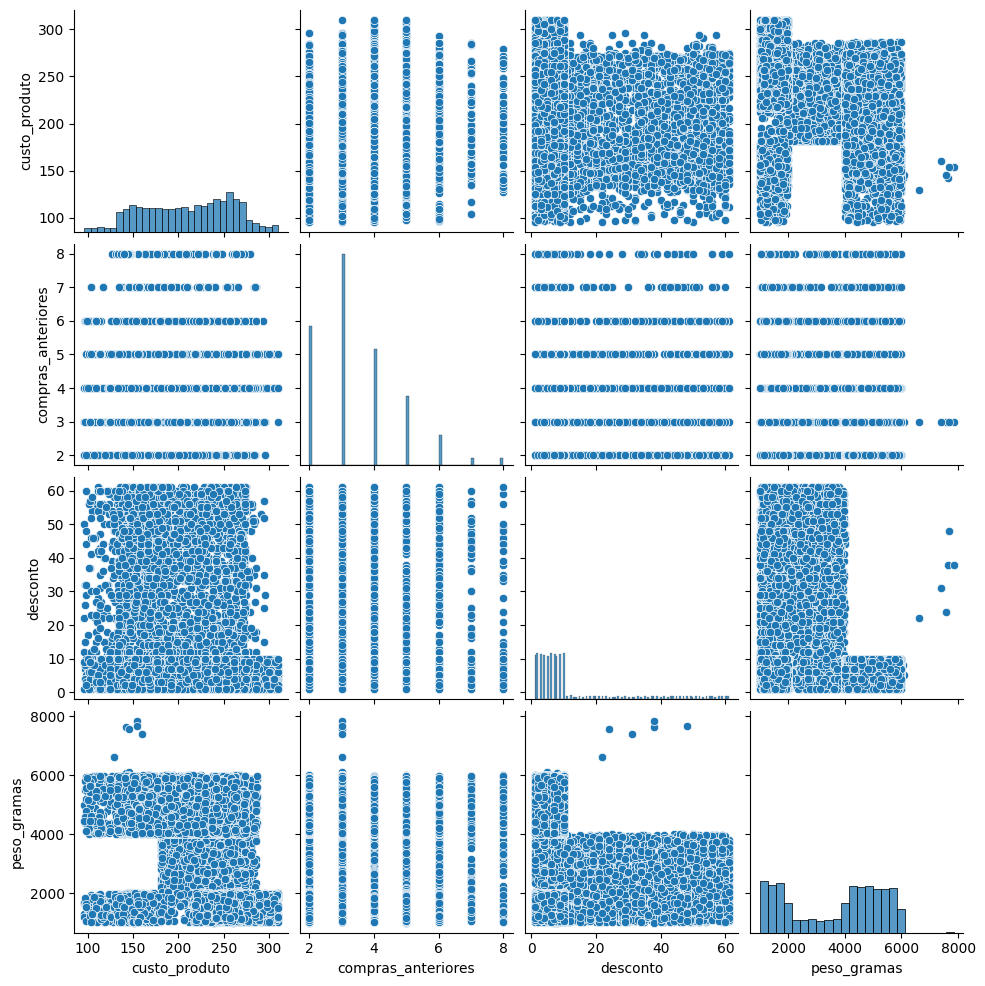

In [22]:
# Scatter plot
sns.pairplot(data = dados[nums])


- Aqui estamos buscando correlações, e, esperavamos não visualizá-las. Isso significa que não correlação entre as variáveis independentes, portanto, não há multicolinearidade.

Conclusão: há indenpendência entre as variáveis, inexistindo multicolineatidade.

Todas seguirão para o processo de feature engeneering.

**Categóricas**

In [ ]:
# resumo - categóricas
dados[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


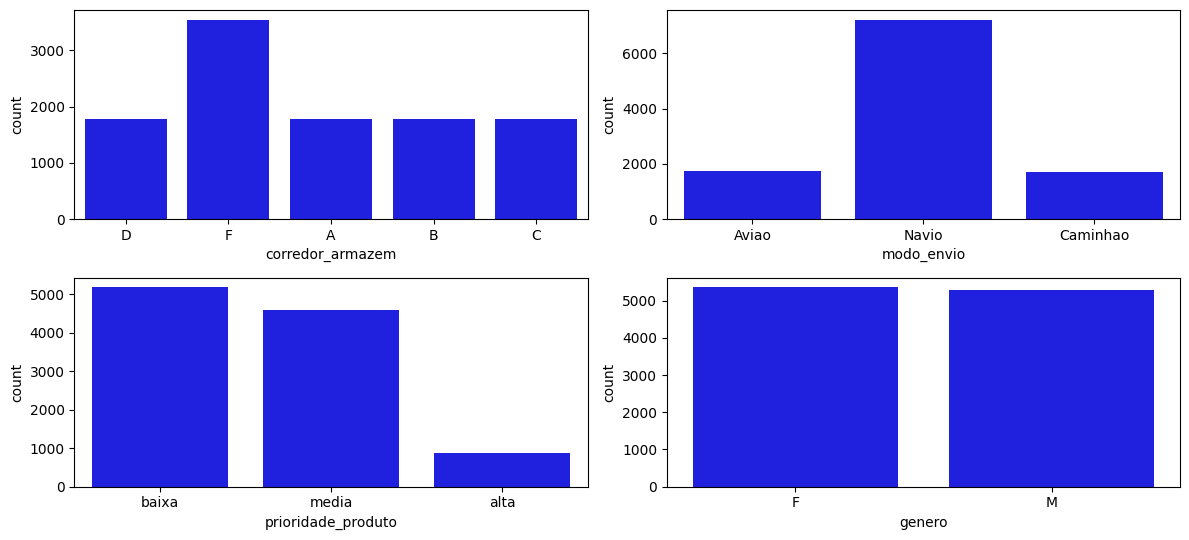

In [ ]:
# Visualizando frequência dos dados
#amostra
dadosSample = dados.sample(1000, random_state= 42)
plt.figure(figsize = (12,5.5))
for i, col in enumerate(cats):
  plt.subplot(2, 2, i + 1)
  sns.countplot(data = dados, x = col, color = 'blue', orient = 'v')
  plt.tight_layout()

### Feature extraction

- Método utilizado: entendimento do profundo do negócio.

In [23]:
# Cópia do dataframe
df = dados.copy(deep = True)

Hipótese 1:

Os atrasos no envio de produtos são iguais, tem sempre as mesmas proporções? A prioridade gera mais ou menos atrasos?

**Criaremos uma nova variável, que represente a porformance do envio de produto, com bases nas seguintes regra de negócio:**

- Se a performance do produto era alta e gerou atrasos: crítico
- Se a performance do produto era média e gerou atrasos: problemático
- Se a performance do produto era baixa e gerou atrasos: tolerável
- Opção em que o envio foi feito no prazo, não significa nada.

In [24]:
# Distribuição da variável 'prioridade_pruduto'
df.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [25]:
# Dsitribuição da varável 'entregue_no_prazo'
df.entregue_no_prazo.value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

In [26]:
# Aplicando regra de negócio criada
# Cria variável
df['performanceAtraso'] = np.nan
# Preenche a variável com as regras de negócio
df['performanceAtraso'] = np.where(
    (df['prioridade_produto'] == 'alta') & (df['entregue_no_prazo'] == 0), "Critico",
    np.where(
        (df['prioridade_produto'] == 'media') & (df['entregue_no_prazo'] == 0), "Problematico",
        np.where(
            (df['prioridade_produto'] == 'baixa') & (df['entregue_no_prazo'] == 0), "Toleravel", 'Pontual'
        )
    )
)

In [27]:
# visualização
df.performanceAtraso.value_counts()

Pontual         6282
Toleravel       2134
Problematico    1917
Critico          310
Name: performanceAtraso, dtype: int64

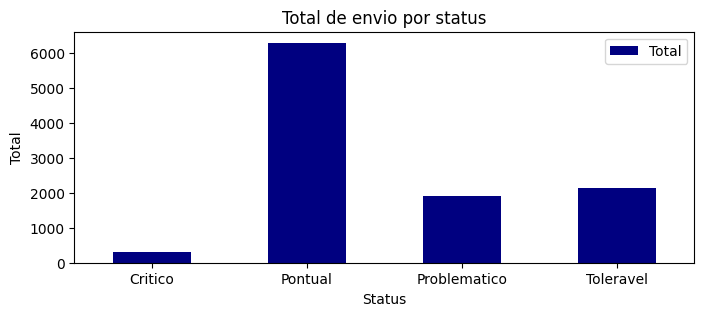

In [28]:
# Avaliando impacto da nova variável
# criando df para relatório
dfEng_reportPerformanceAtraso = df.groupby(['performanceAtraso',
                                               'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
# Renomeando colunas
dfEng_reportPerformanceAtraso.columns  = ['performanceAtraso', 'entregue_no_prazo', 'frequencia']

# Realizando pivot
dfEng_reportPerformanceAtraso = pd.pivot_table(dfEng_reportPerformanceAtraso,
                                               index = 'performanceAtraso',
                                               columns = 'entregue_no_prazo', #cada categoria virou uma coluna
                                               values = 'frequencia').reset_index() #são os valores que vão preencher as colunas
# Ajustando título
dfEng_reportPerformanceAtraso.columns = ['Status do envio', 'Total atraso', 'Total no prazo']
# Substtuindo valores
dfEng_reportPerformanceAtraso['Total atraso'] = dfEng_reportPerformanceAtraso['Total atraso'].replace(np.nan, 0)

dfEng_reportPerformanceAtraso['Total no prazo'] = dfEng_reportPerformanceAtraso['Total no prazo'].replace(np.nan, 0)

dfEng_reportPerformanceAtraso['Total'] = dfEng_reportPerformanceAtraso['Total atraso'] + dfEng_reportPerformanceAtraso['Total no prazo']

# Drop das colunas
dfEng_reportPerformanceAtraso.drop(dfEng_reportPerformanceAtraso.columns[[1,2]], axis = 1, inplace=True)
dfEng_reportPerformanceAtraso

# plotando barras
dfEng_reportPerformanceAtraso.set_index("Status do envio").plot(kind = 'bar',
                                                                colormap = 'jet',
                                                                figsize=(8,3),
                                                                title = 'Total de envio por status',
                                                                xlabel = 'Status',
                                                                ylabel = 'Total')
plt.xticks(rotation = 0)
plt.show()


Percebe-se que a grande maioria foi entregue no prazo, mas, quando se categoriza os atrasos, é evidente haver uma relação com a variável alvo.

Hipótese 2.

O modo de envio dos produtos associado à proiridade de envio, tem impacto no atraso?

Para responder, vamos criar as seguintes regras de negócio:

- Se a prioridade é alta, navio = crito navio
- Se a prioridade é média, navio=problemático navio
- Se a prioridade é baixa,navio=tolerável navio
- Se a prioridade é alta, aviao= crito aviao
- Se a prioridade é média, aviaoproblemático aviao
- Se a prioridade é baixa,aviaotolerável aviao
- Se a prioridade é alta, caminhao= crito caminhao
- Se a prioridade é média, caminhaoproblemático caminhao
- Se a prioridade é baixa, caminhaotolerável caminhao
- Outra opção, não representa problema

In [29]:
# Visualizando frequência da variável 'modo_envio'
df.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [30]:
# Aplicando regra de negócio
df['performanceModoEnvio'] = np.where(
    #Navio
    (df.prioridade_produto == 'alta') & (df.modo_envio == 'Navio') & (df.entregue_no_prazo == 0), 'CriticoNavio',
    np.where((df.prioridade_produto == 'media') & (df.modo_envio == 'Navio') & (df.entregue_no_prazo == 0), 'ProblematicoNavio',
             np.where((df.prioridade_produto == 'baixa') & (df.modo_envio == 'Navio') & (df.entregue_no_prazo == 0), 'ToleravelNavio',
                      #Aviao
                      np.where((df.prioridade_produto == 'alta') & (df.modo_envio == 'Aviao') & (df.entregue_no_prazo == 0), 'CriticoAviao',
                               np.where((df.prioridade_produto == 'media') & (df.modo_envio == 'Aviao') & (df.entregue_no_prazo == 0), 'ProblematicoAviao',
                               np.where((df.prioridade_produto == 'baixa') & (df.modo_envio == 'Aviao') & (df.entregue_no_prazo == 0), 'ToleravelAviao',
                                        #Caminhao
                                        np.where((df.prioridade_produto == 'alta') & (df.modo_envio == 'Caminhao') & (df.entregue_no_prazo == 0), 'CriticoCaminhao',
                                        np.where((df.prioridade_produto == 'media') & (df.modo_envio == 'Caminhao') & (df.entregue_no_prazo == 0), 'ProblematicoCaminhao',
                                        np.where((df.prioridade_produto == 'baixa') & (df.modo_envio == 'Caminhao') & (df.entregue_no_prazo == 0), 'ToleravelCaminhao',
                                                 "SemAtraso")))))))))

In [31]:
# Frequência da nova variável
df.performanceModoEnvio.value_counts()

SemAtraso               6282
ToleravelNavio          1453
ProblematicoNavio       1307
ToleravelCaminhao        350
ToleravelAviao           331
ProblematicoCaminhao     310
ProblematicoAviao        300
CriticoNavio             194
CriticoAviao              65
CriticoCaminhao           51
Name: performanceModoEnvio, dtype: int64

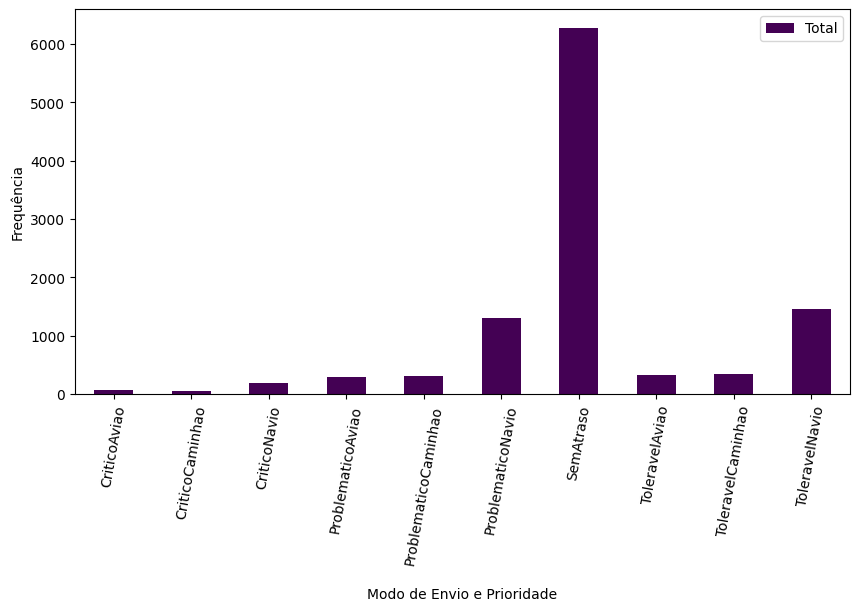

In [32]:
dfEng_report2 = df.groupby(["performanceModoEnvio",
                               "entregue_no_prazo"]).agg({"prioridade_produto": ["count"]}).reset_index()

dfEng_report2.columns = ['performanceModoEnvio', 'entregur_no_prazo', 'frequencia']

# pivot dos dados
dfEng_report2 = pd.pivot_table(dfEng_report2,
                               index = 'performanceModoEnvio',
                               columns = 'entregur_no_prazo',
                               values = 'frequencia').reset_index()
# Preencher os nan com 0
dfEng_report2.columns = ['performanceModoEnvio', 'TotalAtraso', 'TotalNoPrazo']

# Tratando NAN gerados
dfEng_report2['TotalAtraso'] = dfEng_report2['TotalAtraso'].replace(np.nan, 0)
dfEng_report2['TotalNoPrazo'] = dfEng_report2['TotalNoPrazo'].replace(np.nan, 0)

# Inificando variável
dfEng_report2['Total'] = dfEng_report2.TotalAtraso + dfEng_report2.TotalNoPrazo

#drop das variável não usadas
dfEng_report2.drop(columns=['TotalAtraso', 'TotalNoPrazo'], axis = 1, inplace = True)

#Plot
dfEng_report2.set_index('performanceModoEnvio').plot(kind = 'bar',
                                                     xlabel = '\nModo de Envio e Prioridade',
                                                     ylabel = 'Frequência',
                                                     figsize = (10,5),
                                                     cmap = 'viridis')
plt.xticks(rotation=80);

Hipótese 3:

Há diferença na performance de envio dos produtos, quando recebem algum tipo de desconto?

Primeira variável: faixa de desconto (binária)

- Desconto >= média
- Desconto < média

Segunda variável: Performance por faixa de desconto

- acima de média e houve atraso = acimaAtraso
- abaixo da média e houve atraso = abaixoAtraso
- acima da média e não houve atraso = acimaPontual
- abaixo da média e não houve atraso = abaixoPontual

In [33]:
# Criando variável faixa desconto
df['faixaDesconto'] = np.where(df.desconto >= 12, 'Acima', "Abaixo")

# Aplicando regra de negócio
df['performanceFaixaDesconto'] = np.where(
    (df.faixaDesconto == 'Acima') & (df.entregue_no_prazo == 0), 'acimaAtraso',
    np.where((df.faixaDesconto == 'Acima') & (df.entregue_no_prazo == 1), "acimaPontual",
             np.where((df.faixaDesconto == 'Abaixo') & (df.entregue_no_prazo == 0), "abaixoAtraso", "abaixoPontual")))


In [34]:
# Frequência da nova variável
df.performanceFaixaDesconto.value_counts()

abaixoAtraso     4361
abaixoPontual    3908
acimaPontual     2374
Name: performanceFaixaDesconto, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'abaixoAtraso'),
  Text(1, 0, 'abaixoPontual'),
  Text(2, 0, 'acimaPontual')])

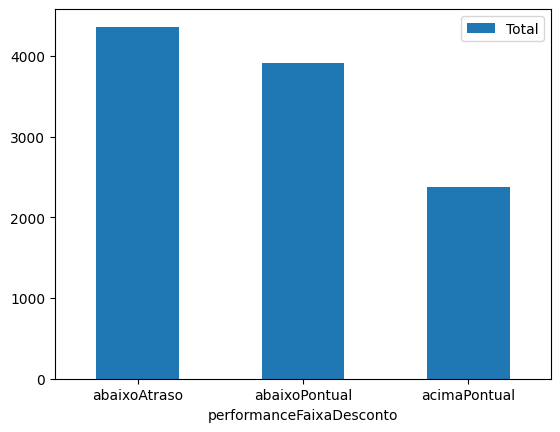

In [38]:
# impacto da nova variável
# agrupando
dfEng_report3 = df.groupby(['performanceFaixaDesconto',
                               "entregue_no_prazo"]).agg({"ID": ['count']}).reset_index()

# Renomenando
dfEng_report3.columns = ['performanceFaixaDesconto', 'entregue_no_prazo', 'frequencia']

# Aplicando pivot
dfEng_report3 = pd.pivot_table(data = dfEng_report3,
                               index = 'performanceFaixaDesconto',
                               columns = 'entregue_no_prazo',
                               values = 'frequencia').reset_index()
# replace nan
dfEng_report3.columns = ['performanceFaixaDesconto', 'TotalAtraso', 'TotalNoPrazo']

# Tratando NAN gerados
dfEng_report3.TotalAtraso = dfEng_report3.TotalAtraso.replace(np.nan, 0)
dfEng_report3.TotalNoPrazo = dfEng_report3.TotalNoPrazo.replace(np.nan, 0)

# Consolidando variável
dfEng_report3['Total'] = dfEng_report3.TotalAtraso + dfEng_report3.TotalNoPrazo

#Drop
dfEng_report3.drop(columns = ['TotalAtraso', 'TotalNoPrazo'], axis = 1, inplace = True)

#Plot
dfEng_report3.set_index('performanceFaixaDesconto').plot(kind = 'bar')
plt.xticks(rotation = 0)

A enharia das demais variáveis deve seguir com todas as variáveis, mas, este projeto visava apenas a demonstração da habilidade de fazer extração de atributos.

In [40]:
df.to_csv('dfeng.csv', encoding='utf8', sep = ',')